["Timestamp", "User Count", "Type", "Name", "Requests/s", "Failures/s", "50%", "66%", "75%", "80%", "90%", "95%", "98%", "99%", "99.9%", "99.99%", "100%", "Total Request Count", "Total Failure Count", "Total Median Response Time", "Total Average Response Time", "Total Min Response Time", "Total Max Response Time", "Total Average Content Size"]


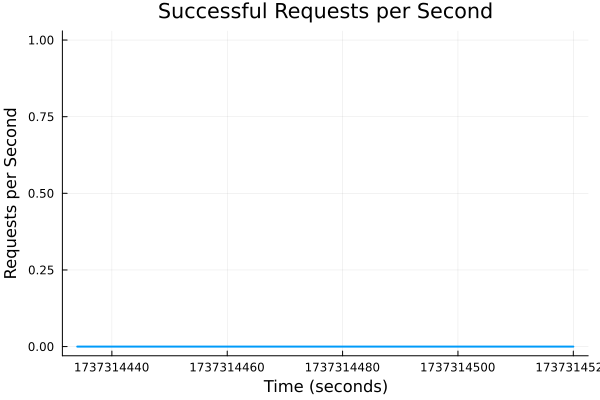

GKS: String is too long in routine INQ_TEXT
GKS: String is too long in routine INQ_TEXT
GKS: String is too long in routine INQ_TEXT


In [6]:
using CSV, DataFrames, Plots

# Load the data
data = CSV.read("logs/locust_log-u10r2t2.csv_stats_history.csv", DataFrame)

# Ensure column names match
println(names(data))  # Prints column names for verification

# Extract columns of interest
timestamps = data.Timestamp
requests_per_second = data."Requests/s"
cases = data.Name

# Plot with grouping by "Name" (case)
plot(
    timestamps,
    requests_per_second,
    group=cases,
    xlabel="Time (seconds)",
    ylabel="Requests per Second",
    title="Successful Requests per Second",
    label=cases,
    lw=2,
    legend=:topleft
)

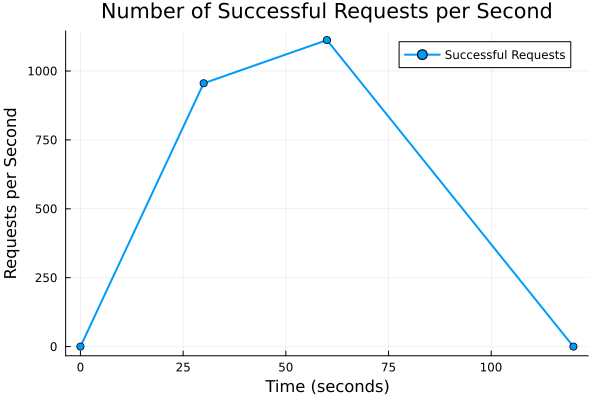

In [7]:
using Plots

# Sample data
timestamps = [0, 30, 60, 120]  # Time in seconds
requests_per_second = [0.00, 955.50, 1112.25, 0.00]  # Successful requests/s

# Create the plot
plot(
    timestamps, 
    requests_per_second, 
    label="Successful Requests", 
    xlabel="Time (seconds)", 
    ylabel="Requests per Second", 
    title="Number of Successful Requests per Second",
    lw=2, 
    marker=:circle, 
    grid=true
)

# Display the plot


In [8]:
using CSV, DataFrames, Plots

# Load Locust output data
local_data = CSV.read("output_locust_local_stats.csv", DataFrame)
vmss_data = CSV.read("output_locust_vmss_stats.csv", DataFrame)
webapp_data = CSV.read("output_locust_webapp_stats.csv", DataFrame)
function_data = CSV.read("output_locust_function_stats.csv", DataFrame)

# Extract timestamps and requests/s
timestamps_local = local_data.Timestamp
requests_local = local_data."Requests/s"

timestamps_vmss = vmss_data.Timestamp
requests_vmss = vmss_data."Requests/s"

timestamps_webapp = webapp_data.Timestamp
requests_webapp = webapp_data."Requests/s"

timestamps_function = function_data.Timestamp
requests_function = function_data."Requests/s"

# Plot the data
plot(
    timestamps_local, requests_local,
    label="Local Deployment",
    xlabel="Time (seconds)",
    ylabel="Requests per Second",
    title="Requests per Second for Various Deployments",
    lw=2
)

plot!(
    timestamps_vmss, requests_vmss,
    label="VM Scale Set",
    lw=2
)

plot!(
    timestamps_webapp, requests_webapp,
    label="Web App",
    lw=2
)

plot!(
    timestamps_function, requests_function,
    label="Function App",
    lw=2
)

# Show grid and legend
plot!(grid=true, legend=:topleft)


LoadError: ArgumentError: "output_locust_local_stats.csv" is not a valid file or doesn't exist